# Controlling Flareplots
The purpose of this notebook is to show the different ways in which a user can select which residues get shown or hidden in a flareplot, and how they can be broken down into different types of fragments to inform about the molecular topology.

We will try different ways of calling the method [plot_freqs_as_flareplot](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot), which is a class method of the object [ContactGroup](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html). Under the hood, the lower-level [mdciao.flare.freqs2flare](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2flare.html#mdciao.flare.freqs2flare) is at work, which is explained in [this other notebook](https://proteinformatics.uni-leipzig.de/mdciao/notebooks/Comparing_CGs_Flares.html#The-Lower-Level-Method-freqs2flare)

We will use as an example the [3SN6](https://www.rcsb.org/structure/3sn6) structure:  
*Crystal structure of the beta2 adrenergic receptor-Gs protein complex*, Rasmussen, S.G. et al., Nature 2011, https://doi.org/10.1038/nature10361

In [1]:
import mdciao
geom = mdciao.cli.pdb("3SN6")
fragments = mdciao.fragments.get_fragments(geom.top)

Checking https://files.rcsb.org/download/3SN6.pdb ...Please cite the following 3rd party publication:
 * Crystal structure of the beta2 adrenergic receptor-Gs protein complex
   Rasmussen, S.G. et al., Nature 2011
   https://doi.org/10.1038/nature10361
Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    349 AAs     THR9 (     0) -   LEU394 (348   ) (0)  resSeq jumps
fragment      1 with    340 AAs     GLN1 (   349) -   ASN340 (688   ) (1) 
fragment      2 with     58 AAs     ASN5 (   689) -    ARG62 (746   ) (2) 
fragment      3 with    159 AAs  ASN1002 (   747) -  ALA1160 (905   ) (3) 
fragment      4 with    284 AAs    GLU30 (   906) -   CYS341 (1189  ) (4)  resSeq jumps
fragment      5 with    128 AAs     GLN1 (  1190) -   SER128 (1317  ) (5) 
fragment      6 with      1 AAs  P0G1601 (  1318) -  P0G1601 (1318  ) (6) 


These fragments do not exactly coincide with the ``chains`` (check [this](https://proteinformatics.uni-leipzig.de/mdciao/notebooks/Tutorial.html#Fragmentation-Heuristics) for more info), but they are useful for this example. The fragments are:  

0. G-protein $\alpha$ sub-unit  
1. G-protein $\beta$ sub-unit  
2. G-protein $\gamma$ sub-unit  
3. Bacteriophage T4 lysozyme as N-terminus  
4. $\beta_2$ adrenergic receptor  
5. VHH nanobody  
6. Ligand P0G  

Hence, we name them accordingly:

In [2]:
fragment_names=['Galpha','Gbeta','Ggamma','T4L','B_2AR','NB','P0G']

Now, we choose which fragments to use when computing the G-protein-Receptor interface, via the ``frag_idxs_group`` variables, namely:      
* ```frag_idxs_group_1=[0,1,2]```&nbsp;: the G$\alpha$, G$\beta$, and G$\gamma$ sub-units   
* ```frag_idxs_group_2=[4]```&emsp;&emsp;&ensp;: the B2AR receptor

And we [compute the interface](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.interface.html#mdciao.cli.interface) without producing or saving any figures or files using the [options](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.interface.html#mdciao.cli.interface) ```figures=False``` and ```no_disk=True```.

In [3]:
GPCR = mdciao.nomenclature.LabelerGPCR("adrb2_human")
CGN = mdciao.nomenclature.LabelerCGN("3SN6")
intf = mdciao.cli.interface(geom,
                            frag_idxs_group_1=[0, 1, 2],
                            frag_idxs_group_2=[4], 
                            no_disk=True,                            
                            figures=False,
                            fragment_names=fragment_names,
                            fragments=fragments,
                            GPCR_uniprot=GPCR, CGN_PDB=CGN,
                            accept_guess=True,
                            ctc_control=1.)

No local file ./adrb2_human.xlsx found, checking online in
https://gpcrdb.org/services/residues/extended/adrb2_human ...done!
Please cite the following reference to the GPCRdb:
 * Kooistra et al, (2021) GPCRdb in 2021: Integrating GPCR sequence, structure and function
   Nucleic Acids Research 49, D335--D343
   https://doi.org/10.1093/nar/gkaa1080
For more information, call mdciao.nomenclature.references()
done without 404, continuing.
Using CGN-nomenclature, please cite
 * Flock et al, (2015) Universal allosteric mechanism for G$\alpha$ activation by GPCRs
   Nature 2015 524:7564 524, 173--179
   https://doi.org/10.1038/nature14663
No local file ./CGN_3SN6.txt found, checking online in
https://www.mrc-lmb.cam.ac.uk/CGN/lookup_results/3SN6.txt ...done without 404, continuing.
No local PDB file for 3SN6 found in directory '.', checking online in 
https://files.rcsb.org/download/3SN6.pdb ...found! Continuing normally
Will compute contact frequencies for trajectories:
<mdtraj.Trajectory w

  0%|                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.46s/it]

These 20 contacts capture 20.00 (~100%) of the total frequency 20.00 (over 42693 input contacts)
As orientation value, the first 18 ctcs already capture 90.0% of 20.00.
The 18-th contact has a frequency of 1.00


    freq                            label residue idxs   sum
0    1.0   R385@G.H5.17    - I233@5.72x72     339 1106   1.0
1    1.0   H387@G.H5.19    - A134@3.53x53     341 1010   2.0
2    1.0      T350@G.h4s6.3   - R239@ICL3     304 1112   3.0
3    1.0  Q384@G.H5.16    - P138@34.50x50     338 1014   4.0
4    1.0   D381@G.H5.13    - K232@5.71x71     335 1105   5.0
5    1.0   L393@G.H5.25    - A271@6.33x33     347 1119   6.0
6    1.0  F376@G.H5.8     - F139@34.51x51     330 1015   7.0
7    1.0   Q384@G.H5.16    - I135@3.54x54     338 1011   8.0
8    1.0   Q384@G.H5.16    - E225@5.64x64     338 1098   9.0
9    1.0   R385@G.H5.17    - Q229@5.68x68     339 1102  10.0
10   1.0   L393@G.H5.25    - T274@6.36x36     347 1122  11.0
11   1.0   Q384@G.H5.16    - Q229@5.68x68     338 1102 

## The ```scheme``` option in ```plot_freqs_as_flareplot```

The ```scheme``` option controls which residues get shown in the flareplot, and how they get split into fragments. This choice can vary between *all residues* and *only those strictly necessary*.

Depending what exactly the user wants to highlight, there's a tradeoff between the number of residues shown and how legible the plot remains. On the one hand, the more residues you show, the more possibilities you have to display the sequence and overall topology of the system with its fragments, e.g. receptor and G-protein and perhaps even sub-domain fragmentation, e.g. breaking the receptor into helices and loops. On the other hand, more residues means smaller fontsizes and possibly a lot of seemingly unused blank space.

Let's go over the main options for ```scheme```. Since we're leaving some out, check the [docs](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot) to see all possibilities.

### ```scheme=='all'```
From the [docs](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot):
```
How to decide which residues to plot
 * 'all'
    plot as many residues as possible. E.g.,
    if a :obj:`self.topology` is present,
    plot all its residues. This can be modified
    with :obj:`fragments`, see above.
```

Drawing this many dots (1319 residues + 3 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


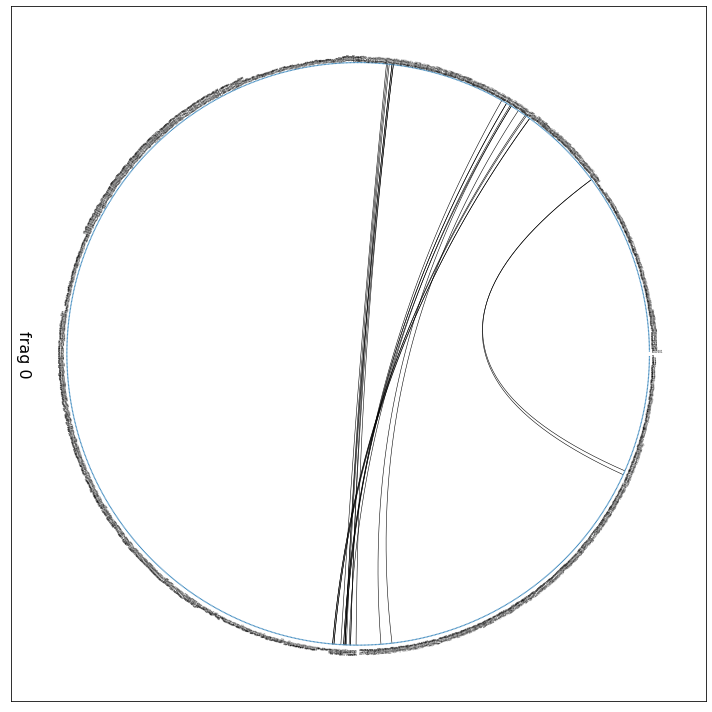

In [4]:
ifig, iax = intf.plot_freqs_as_flareplot(3.5, scheme="all");
ifig.savefig("flare.all.pdf")

Definitively hard to see anything in the notebook. However, open ```flare.all.pdf``` externally and zoom in. You'll see that all information is there. Let's include the fragment information from above, which was:
```
fragments = mdciao.fragments.get_fragments(geom.top)
fragment_names=['Galpha','Gbeta','Ggamma','T4L','B_2AR','NB','P0G']
```

Drawing this many dots (1319 residues + 9 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


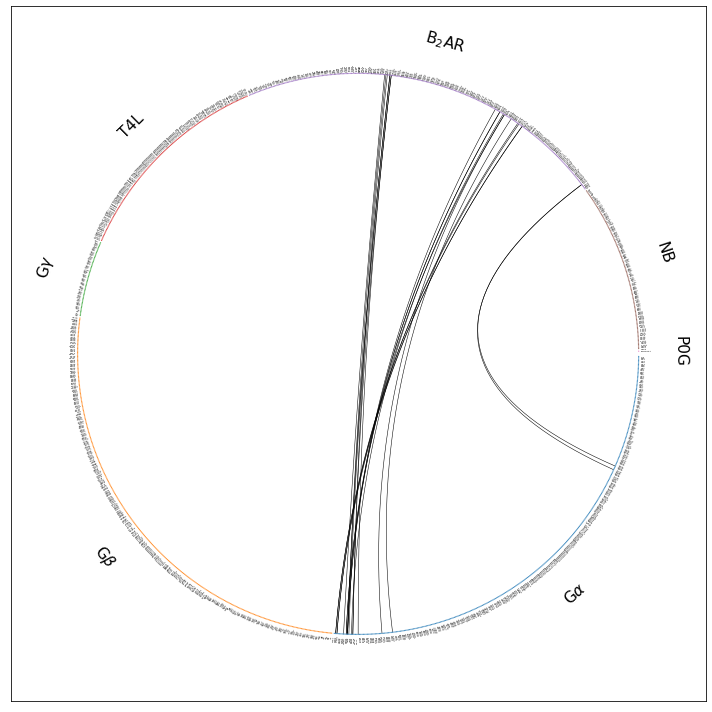

In [5]:
ifig, iax = intf.plot_freqs_as_flareplot(3.5, 
                                         scheme="all",
                                         fragments=fragments,
                                         fragment_names=fragment_names)
ifig.savefig("flare.all.w_fragments.pdf")

Still barely legible in the notebook, but zoom into ```flare.all.w_fragments.pdf``` and you'll notice a couple of things:  
 
 * The residue dots are now grouped into fragments  
 * The fragments are named  
 * The fragments (their residues' dots) are color-coded, e.g. G$\alpha$ is blue, receptor is B$_2$AR is violet

### Unused Space : ```scheme='interface'```
While it might be usefull to plot **all** residues and fragments of the topology, most of the flareplot is *unused*. E.g., we know for sure that the 4TL and the NB won't get any contacts, because they simply were not considered when defining the interface, as we did above:  
    
* ```frag_idxs_group_1=[0,1,2]```&nbsp;: the G$\alpha$, G$\beta$, and G$\gamma$ sub-units   
* ```frag_idxs_group_2=[4]```&emsp;&emsp;&ensp;: the B2AR receptor

So, we can hide 4TL and the NB by using the ```scheme=interface``` option, which will automatically hide fragments that weren't even considered in the interface definition. This is possible because the residues defining these fragments are stored internally in the [intf.interface_fragments]() object, and get re-used here.

From the [docs](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot):
```
* 'interface':
    use only the fragments in
    :obj:`self.interface_fragments`. Will
    only work if self.is_interface is True
```

Drawing this many dots (1031 residues + 6 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


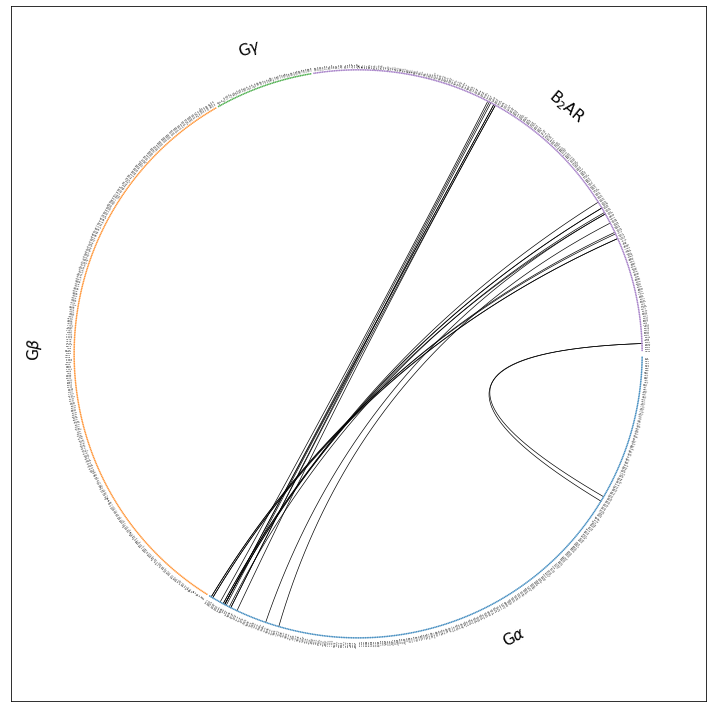

In [6]:
intf.plot_freqs_as_flareplot(3.5, 
                             scheme="interface", 
                            fragments=fragments, 
                            fragment_names=fragment_names,
                            );
ifig.savefig("flare.interface.w_fragments.pdf")

Now, we only have the fragments that were interesting to us to begin with. Still, a lot of unused space, because some of the fragments we included in the interface definition (G$\beta$ and G$\gamma$), as potential interface partners, don't have any contacts with the B2AR (at 3.5 Angstrom) in the 3SN6 structure. So, we hide them in the next paragraph.

### Unused Space: ```scheme=interface_sparse```
From the [docs](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot):
```
* 'interface_sparse':
    like 'interface', but using the input :obj:`fragments`
    to break self.interface_fragments (which are only two,
    by definition) further down into other fragments.
    Of these, show only the ones where at least one residue
    participates in the interface. If :obj:`fragments` is
    None, `scheme='interface'` and `scheme='interface_sparse'`
    are the same thing.
```

Drawing this many dots (633 residues + 4 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


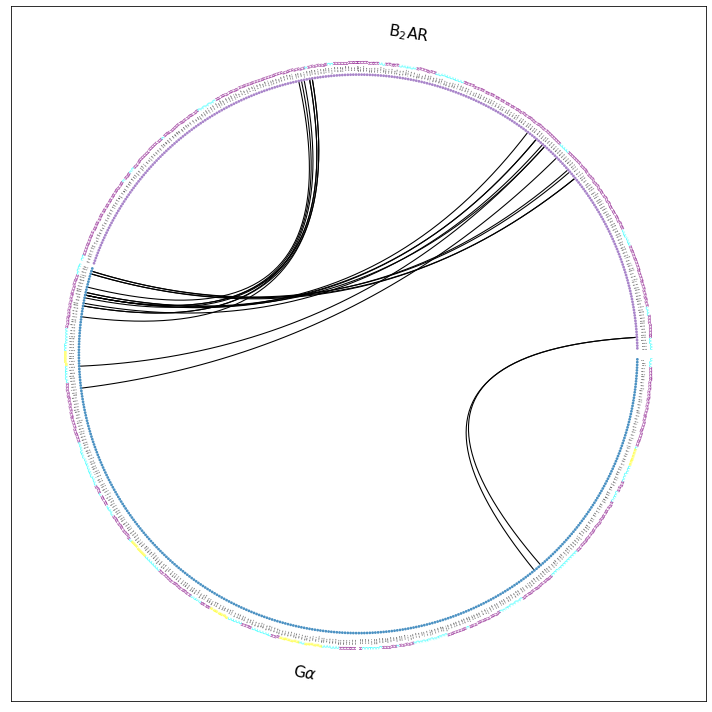

In [7]:
ifig, iax = intf.plot_freqs_as_flareplot(3.5,
                                         scheme="interface_sparse", 
                                         fragments=fragments, 
                                         fragment_names=fragment_names,
                                         SS=True,
                                        );
ifig.savefig("flare.interface_sparse.w_fragments.pdf")

Note that the residues are now annotated with their secondary structure (```SS=True```) as an extra color-coded ring of letters:

* $\alpha$-helix is <span style='color:Purple'> purple H</span>
* $\beta$-sheet is <span style='color:Yellow'>yellow B</span>
* random coil is <span style='color:Cyan'> cyan C</span>

Now, we can e.g. identify the helices and loops. E.g. we see the CT of the G$\alpha$ (around 9 o'clock in the plot) is responsible for most contacts. It is mostly helical, except for the last, terminal residues. In the B2AR, we can identify helical domains and the loops connecting them. If we walk the the B2AR-fragment counter-clockwise (starting at around 3 o'clock), we see the last few CT residues as coil, then H8, then the H8-TM7 coil, then H7, then a loop, then TM6, then a loop, and then TM5.

## Using the Blank Space
The next step is either to get rid of the unused, blank space (see further down) or to use it for something. In the next paragraph, we use it to inform about sub-fragments of the topology. In our case, we do this by using 


### Consensus Labels
We now incorporate consensus labels for the receptor and the G-protein into the flareplot.  In ```mdciao```, consensus labels are dealt with using the [LabelerConsensus](http://proteinformatics.uni-leipzig.de/mdciao/api/generated/mdciao.nomenclature.html) objects. These were created at the very top of the notebook with :

```
GPCR = mdciao.nomenclature.LabelerGPCR("adrb2_human")
CGN = mdciao.nomenclature.LabelerCGN("3SN6")
```

These objects are very versatile and can be reused with multiple topologies or multiple function calls. Because of that flexibility, there's two ways in which we can use them in the flareplot, via the ```consensus_maps``` argument, with different results. From the [docs](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot):

```
consensus_maps : list, default is None
    The items of this list are either:
     * indexables containing the consensus
        labels (strings) themselves. They
        need to be "gettable" by residue index, i.e.
        dict, list or array. Typically, one
        generates these maps by using the top2labels
        method of the LabelerConsensus object
     * :obj:`LabelerConsensus`-objects
        When these objects are passed, their
        top2labels and top2fragments methods are
        called on-the-fly, generating not only
        the consensus labels but also the consensus
        fragments (i.e. subdomains) to further fragment
        the topology into sub-domains, like TM6 or G.H5.
        If :obj:`fragments` are parsed, they will be
        made compatible with the consensus fragments.
    If you want the consensus labels but not
    the sub-fragmentation, simply use the first option.
```
            
We will use second option, which will automaticall a) annotate residues and b) fragment the topology (the dots) further into sub-domains corresponding to the consensus sub-domains.

Drawing this many dots (633 residues + 52 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


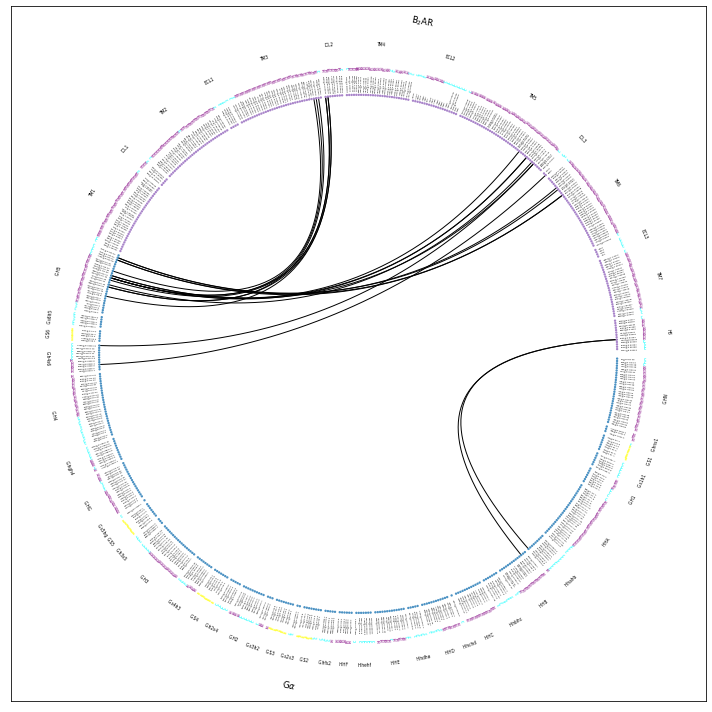

In [8]:
ifig, iax = intf.plot_freqs_as_flareplot(3.5, 
                                         scheme="interface_sparse", 
                                         fragments=fragments, 
                                         fragment_names=fragment_names,
                                         consensus_maps=[GPCR, CGN],
                                         SS=True)
ifig.savefig("flare.interface_sparse.w_fragments.w_consensus.pdf")

Same amount of blank space, but now at least we get to see how the consensus descriptors are used to fragment the G$\alpha$ and the B$_2$AR further. Also, all residues are annotated with their consensus labels, e.g. ```L393@G.H5.25``` and ```A271@6.33```. Legibility remains an issue in the notebook, but check ```flare.interface_sparse.w_fragments.w_consensus.pdf``` and you'll see all annotations clearly there. 

### Unused Sub-fragments: `scheme='consensus_sparse'`
We apply the same sparse logic as before, but to the consensus labels, i.e., only show consensus fragments that were part of the interface. From the [docs](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot):
```
* 'consensus_sparse':
    like 'interface_sparse', but
    leaving out sub-domains not participating
    in the interface with any contacts.For this,
    the :obj:`consensus_maps` need to
    be actual :obj:`LabelerConsensus`-objects
```
<a id='scheme_consensus_plot'></a>

Drawing this many dots (196 residues + 12 padding spaces) in a panel 10.0 inches wide/high 
forces too small dotsizes and fontsizes. If crowding effects occur, either reduce the
number of residues or increase the panel size


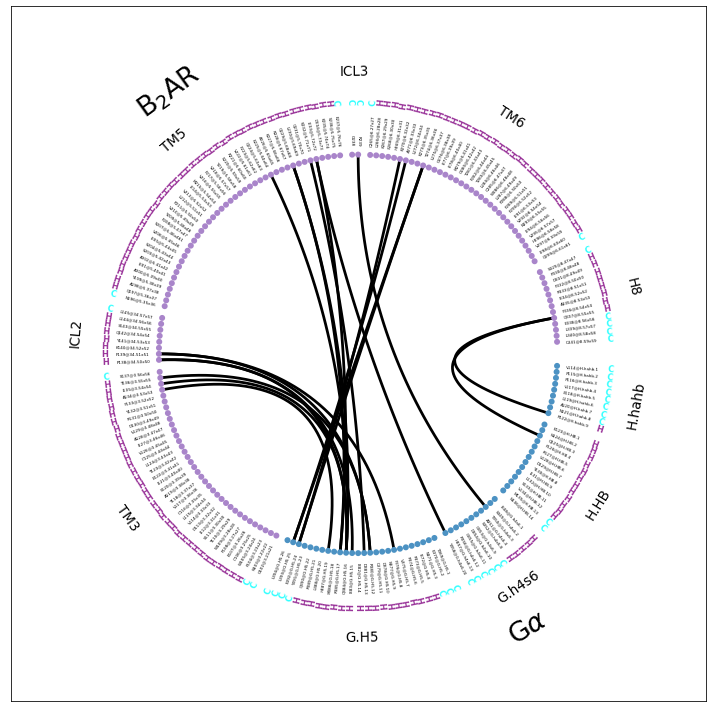

In [9]:
ifig, iax = intf.plot_freqs_as_flareplot(3.5, 
                                         scheme="consensus_sparse", 
                                         fragments=fragments, 
                                         fragment_names=fragment_names,
                                         consensus_maps=[GPCR, CGN],
                                         SS=True,
                                        );
ifig.savefig("flare.consensus.w_fragments.w_consensus.pdf")

This seems to be a very good compromise for the representation. On the one hand, we're leaving out a lot of *unused* sub-domain fragments, e.g. the extracellular loops (and some helices) of the receptor and the many parts of the G$\alpha$ far away from the interface (e.g. the entire RAS domain). On the other hand, the topology is still somewhat represented, with full helices and loops clearly noted and visually separated. Of course, there still is some distortion and sequence jumps (e.g ICL2 to TM5 or G.h4s6 to G.H5) but these are easy to spot and are informative themselves: if TM4 and ECL2 aren't shown, they are not participating in the computed interface.

### Unused Residues: ```scheme='residues'```
We can even get rid of **all** residues not involved in the interface. 
From the [docs](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.plot_freqs_as_flareplot):
```
 * 'residues':
    plot only the residues present in self.res_idxs_pairs
```

If the interface is plotted using the same ```ctc_cutoff_Ang```, these residues will be those listed in the initial output, on top of the notebook:

```
    freq                         label residue idxs   sum
0    1.0   R385@G.H5.17    - I233@5.72     339 1106   1.0
1    1.0   H387@G.H5.19    - A134@3.53     341 1010   2.0
2    1.0   T350@G.h4s6.3   - R239@ICL3     304 1112   3.0
3    1.0  Q384@G.H5.16    - P138@34.50     338 1014   4.0
4    1.0   D381@G.H5.13    - K232@5.71     335 1105   5.0
5    1.0   L393@G.H5.25    - A271@6.33     347 1119   6.0
6    1.0  F376@G.H5.8     - F139@34.51     330 1015   7.0
7    1.0   Q384@G.H5.16    - I135@3.54     338 1011   8.0
8    1.0   Q384@G.H5.16    - E225@5.64     338 1098   9.0
9    1.0   R385@G.H5.17    - Q229@5.68     339 1102  10.0
10   1.0   L393@G.H5.25    - T274@6.36     347 1122  11.0
11   1.0   Q384@G.H5.16    - Q229@5.68     338 1102  12.0
12   1.0   P122@H.hahb.9   - Q337@8.55      85 1185  13.0
13   1.0   Q125@H.HB.3     - Q337@8.55      88 1185  14.0
14   1.0   R380@G.H5.12    - T136@3.55     334 1012  15.0
15   1.0  R380@G.H5.12    - F139@34.51     334 1015  16.0
16   1.0   E392@G.H5.24    - T274@6.36     346 1122  17.0
17   1.0  I383@G.H5.15    - P138@34.50     337 1014  18.0
18   1.0   Y358@G.h4s6.20  - I233@5.72     312 1106  19.0
19   1.0   E392@G.H5.24    - K270@6.32     346 1118  20.0
````

Depending on the usecase, this can be helpful or not, since most of the topology information is now lost: subfragments are kept but they there's sequence-jumps within them (e.g. TM5, TM6 and G.H5).

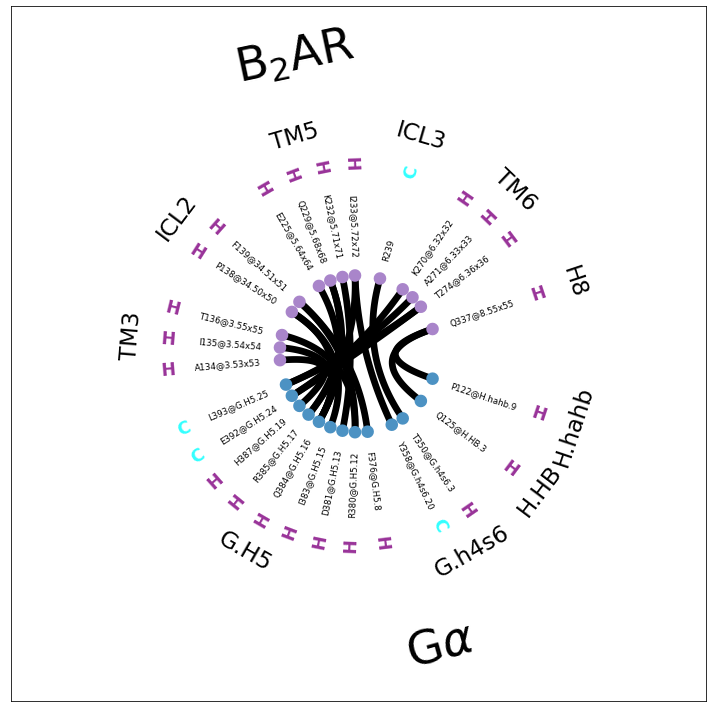

In [10]:
ifig, iax = intf.plot_freqs_as_flareplot(3.5,
                                         scheme="residues", 
                                         fragments=fragments, 
                                         fragment_names=fragment_names,
                                         consensus_maps=[GPCR, CGN],
                                         SS=True,
                                        );


ifig.savefig("flare.residues.w_fragments.w_consensus.pdf")

##  Coarse-Graning Flareplots: Chord Diagrams
Finally, we can choose to coarse-grain the flareplot into a chord-diagram. For this, per-residue contact frequencies are aggregated by fragment, highlighting a fragment's participation in the interface, rather than each residue's.


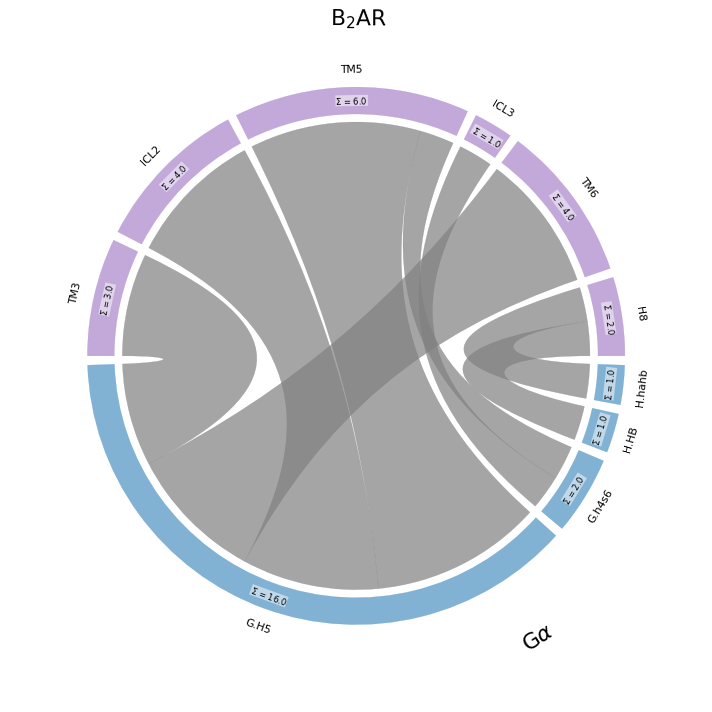

In [11]:
ifig, iax = intf.plot_freqs_as_flareplot(3.5,
                                         scheme="all", 
                                         fragments=fragments, 
                                         fragment_names=fragment_names,
                                         consensus_maps=[GPCR, CGN],
                                         SS=True,
                                         coarse_grain=True, 
                                        );

Here, the per-fragment contact frequencies are not represented as curve opacities, but as **arc lengths**. The the more contacts a fragment has, longer the arc used to represent it. In this case, it's immediately clear that the G.H5 sub-domain of the G$\alpha$ (also called G$\alpha_5$), with 16 contacts, clearly dominates the G-protein's participation in the interface with the B2AR.

Some observations:

* The size of the fragment doesn't necessarily play a role here: only its participation in the interface. E.g. TM3 is clearly a larger fragment than ICL2 (check  [this plot](#scheme_consensus_plot)), but they appear similar in size because their participation in the interface is similar.

* The keyword `scheme` loses meaning here: chord-diagrams are always sparse, i.e. zero-length fragments are never shown. As you see, the `scheme='all'` isn't having any effect.

* Under the hood, [mdciao.flare.freqs2chord](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.flare.freqs2chord.html) is being, called, which itself wraps around the [mpl_chord_diagram](https://pypi.org/project/mpl-chord-diagram/) package. 

The data being represented is the coarse-grained frequency matrix, which is calculated using [mdciao.contacts.ContactGroup.frequency_as_contact_matrix_CG](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.frequency_as_contact_matrix_CG)

In [12]:
intf.frequency_as_contact_matrix_CG(3.5,
                                    fragments=fragments,
                                    fragment_names=fragment_names,
                                    consensus_labelers=[GPCR, CGN],
                                    interface=True).replace(0, "")

TM3 ICL2  TM5 ICL3  TM6   H8
H.hahb                           1.0
H.HB                             1.0
G.h4s6            1.0  1.0          
G.H5    3.0  4.0  5.0       4.0